<a href="https://colab.research.google.com/github/Vetair/MVexercises/blob/main/CAR_LOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Coursework/Car_Logo_Dataset'
dataset_name = dataset_path.split('_')[0]
print('dataset', dataset_name)

dataset Car


In [ ]:
import shutil
import random
import pandas as pd

In [ ]:
classes = os.listdir(dataset_path)

In [ ]:
len(classes)

32

In [ ]:
classes

['14-Land Rover',
 '28-Suzuki',
 '24-Seat',
 '11-Jeep',
 '16-Mazda',
 '20-Nissan',
 '4-Lancia',
 '10-BMW',
 '29-Tesla',
 '32-Acura',
 '25-GMC',
 '15-Lexus',
 '27-Subaru',
 '8-Skoda',
 '13-Citroen',
 '30-Toyota',
 '12-Kia',
 '26-Smart',
 '19-Mitsubishi',
 '1-Volvo',
 '17-Mercedes',
 '23-Renault',
 '7-Ford',
 '2-Volkswagen',
 '9-Honda',
 '21-Opel',
 '6-Daewoo',
 '18-Mini',
 '22-Peugeot',
 '5-Dacia',
 '31-Alfa Romeo',
 '3-Hyundai']

In [ ]:
os.makedirs(os.path.join(dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val'), exist_ok=True)
for PlantVillage in classes:
    os.makedirs(os.path.join(dataset_path, 'train', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'test', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'val', PlantVillage), exist_ok=True)

In [ ]:
test_frac = 0.15
val_frac = 0.15
random.seed(123)

In [ ]:
import os
import random
import shutil
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()

print('{:^18} {:^18} {:^18} {:^18}'.format('categories', 'training set number', 'val set number', 'test set number'))

for PlantVillage in classes:
    old_dir = os.path.join(dataset_path, PlantVillage)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename)

    testset_number = int(len(images_filename) * test_frac)
    valset_number = int(len(images_filename) * val_frac)
    testset_images = images_filename[:testset_number]
    valset_images = images_filename[testset_number:testset_number + valset_number]
    trainset_images = images_filename[testset_number + valset_number:]

    for image in testset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)
        new_test_path = os.path.join(dataset_path, 'test', PlantVillage, image)
        shutil.move(old_img_path, new_test_path)

    for image in valset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)
        new_val_path = os.path.join(dataset_path, 'val', PlantVillage, image)
        shutil.move(old_img_path, new_val_path)

    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)
        new_train_path = os.path.join(dataset_path, 'train', PlantVillage, image)
        shutil.move(old_img_path, new_train_path)

    assert len(os.listdir(old_dir)) == 0
    shutil.rmtree(old_dir)

    print('{:^18} {:^18} {:^18} {:^18}'.format(PlantVillage, len(trainset_images),len(valset_images), len(testset_images)))

    new_row = {'class': PlantVillage, 'trainset': len(trainset_images), 'valset': len(valset_images), 'testset': len(testset_images)}
    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

shutil.move(dataset_path, dataset_name+'_split')

df['total'] = df['trainset'] + df['valset'] + df['testset']
df.to_csv('Data volume statistics.csv', index=False)

    categories     training set number   val set number    test set number  
  14-Land Rover            13                 2                  2         
    28-Suzuki              13                 2                  2         
     24-Seat               13                 2                  2         
     11-Jeep               13                 2                  2         
     16-Mazda              13                 2                  2         
    20-Nissan              13                 2                  2         
     4-Lancia              13                 2                  2         
      10-BMW               13                 2                  2         
     29-Tesla              13                 2                  2         
     32-Acura              13                 2                  2         
      25-GMC               13                 2                  2         
     15-Lexus              13                 2                  2         
    27-Suba

In [ ]:
df

,class,trainset,valset,testset,total
0,14-Land Rover,13,2,2,17
1,28-Suzuki,13,2,2,17
2,24-Seat,13,2,2,17
3,11-Jeep,13,2,2,17
4,16-Mazda,13,2,2,17
5,20-Nissan,13,2,2,17
6,4-Lancia,13,2,2,17
7,10-BMW,13,2,2,17
8,29-Tesla,13,2,2,17
9,32-Acura,13,2,2,17


In [ ]:
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Coursework/Car_split'

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')
print('trainpath', train_dir)
print('valpath', val_dir)
print('testpath', test_dir)

trainpath /content/drive/MyDrive/Colab Notebooks/Coursework/Car_split/train
valpath /content/drive/MyDrive/Colab Notebooks/Coursework/Car_split/val
testpath /content/drive/MyDrive/Colab Notebooks/Coursework/Car_split/test


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=8,
    shuffle = False,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    shuffle = False,
    class_mode='categorical'
)

Found 416 images belonging to 32 classes.
Found 64 images belonging to 32 classes.
Found 64 images belonging to 32 classes.


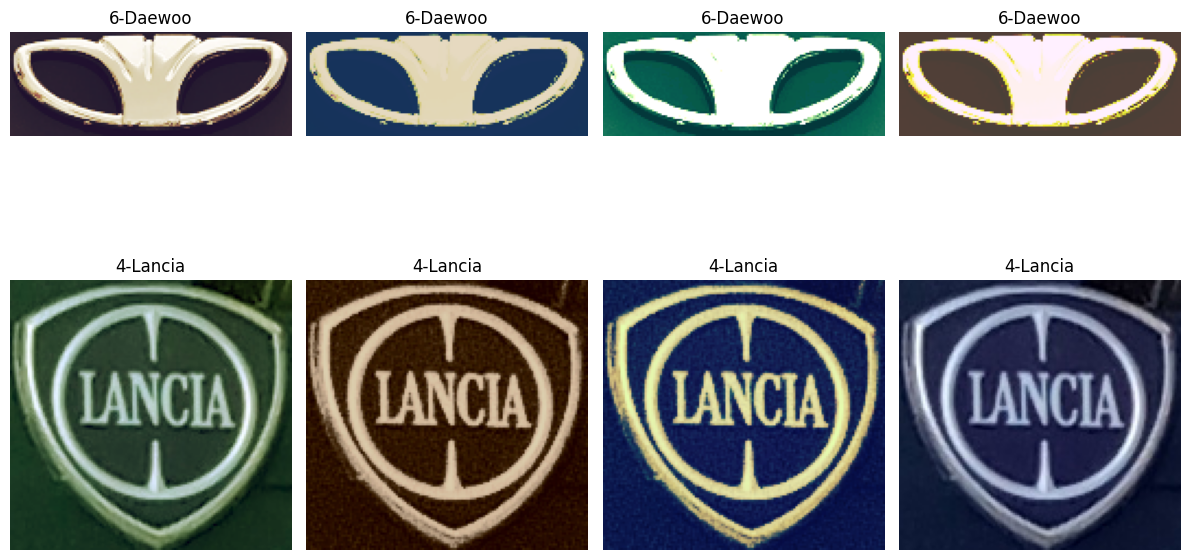

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/Coursework/Car_split/train'

# Get the list of classes in the dataset
class_names = os.listdir(path_to_dataset)

# Randomly select two classes
selected_classes = random.sample(class_names, 2)

# Create a gallery for displaying images
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(selected_classes):
    class_dir = os.path.join(path_to_dataset, class_name)
    image_files = os.listdir(class_dir)

    # Randomly select four images from each class
    selected_images = random.sample(image_files, 4)

    for j, image_name in enumerate(selected_images):
        image_path = os.path.join(class_dir, image_name)
        img = Image.open(image_path)

        # Display images in the gallery
        plt.subplot(2, 4, i * 4 + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print('trainset number', len(train_generator))
print('categories number', len(train_generator.class_indices.keys()))
print('categories name', train_generator.class_indices.keys())

trainset number 52
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [ ]:
print('val number', len(validation_generator))
print('categories number', len(validation_generator.class_indices.keys()))
print('categories name', validation_generator.class_indices.keys())

val number 8
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [ ]:
print('test number', len(test_generator))
print('categories number', len(test_generator.class_indices.keys()))
print('categories name',test_generator.class_indices.keys())

test number 8
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [ ]:
class_names = train_generator.class_indices
n_class = len(class_names)

In [ ]:
class_names

{'1-Volvo': 0,
 '10-BMW': 1,
 '11-Jeep': 2,
 '12-Kia': 3,
 '13-Citroen': 4,
 '14-Land Rover': 5,
 '15-Lexus': 6,
 '16-Mazda': 7,
 '17-Mercedes': 8,
 '18-Mini': 9,
 '19-Mitsubishi': 10,
 '2-Volkswagen': 11,
 '20-Nissan': 12,
 '21-Opel': 13,
 '22-Peugeot': 14,
 '23-Renault': 15,
 '24-Seat': 16,
 '25-GMC': 17,
 '26-Smart': 18,
 '27-Subaru': 19,
 '28-Suzuki': 20,
 '29-Tesla': 21,
 '3-Hyundai': 22,
 '30-Toyota': 23,
 '31-Alfa Romeo': 24,
 '32-Acura': 25,
 '4-Lancia': 26,
 '5-Dacia': 27,
 '6-Daewoo': 28,
 '7-Ford': 29,
 '8-Skoda': 30,
 '9-Honda': 31}

In [ ]:
idx_to_labels = {y:x for x,y in train_generator.class_indices.items()}

In [ ]:
idx_to_labels

{0: '1-Volvo',
 1: '10-BMW',
 2: '11-Jeep',
 3: '12-Kia',
 4: '13-Citroen',
 5: '14-Land Rover',
 6: '15-Lexus',
 7: '16-Mazda',
 8: '17-Mercedes',
 9: '18-Mini',
 10: '19-Mitsubishi',
 11: '2-Volkswagen',
 12: '20-Nissan',
 13: '21-Opel',
 14: '22-Peugeot',
 15: '23-Renault',
 16: '24-Seat',
 17: '25-GMC',
 18: '26-Smart',
 19: '27-Subaru',
 20: '28-Suzuki',
 21: '29-Tesla',
 22: '3-Hyundai',
 23: '30-Toyota',
 24: '31-Alfa Romeo',
 25: '32-Acura',
 26: '4-Lancia',
 27: '5-Dacia',
 28: '6-Daewoo',
 29: '7-Ford',
 30: '8-Skoda',
 31: '9-Honda'}

In [ ]:
import numpy as np
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_generator.class_indices)

In [ ]:
def custom_categorical_crossentropy(y_true, y_pred, label_smoothing=0.1):
    epsilon = tf.keras.backend.epsilon()
    y_true_smoothed = y_true * (1.0 - label_smoothing) + label_smoothing / num_classes
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    cce = -tf.reduce_sum(y_true_smoothed * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(cce)

def custom_categorical_accuracy(y_true, y_pred, threshold=0.5):
    y_pred_thresholded = tf.cast(y_pred > threshold, tf.float32)
    correct_predictions = tf.equal(y_true, tf.round(y_pred_thresholded))
    accuracy = tf.reduce_mean(tf.cast(tf.reduce_all(correct_predictions, axis=-1), tf.float32))
    return accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Multiply
from tensorflow.keras.layers import Add

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # First convolution layer
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second convolution layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Residual connection
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x

def se_block(x, reduction_ratio=16):
    channels = x.shape[-1]

    # Squeeze (Global Average Pooling)
    squeeze = GlobalAveragePooling2D()(x)

    # Excitation (Fully connected layers)
    excitation = Dense(channels // reduction_ratio, activation='relu')(squeeze)
    excitation = Dense(channels, activation='sigmoid')(excitation)

    # Reshape to (1, 1, C)
    excitation = tf.keras.layers.Reshape((1, 1, channels))(excitation)

    # Scale input by the excitation
    scaled_x = Multiply()([x, excitation])

    return scaled_x

def se_residual_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional Layer
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Residual Blocks with SE Attention
    x = residual_block(x, 64)
    x = se_block(x)
    x = residual_block(x, 64)
    x = se_block(x)
    x = residual_block(x, 128, stride=2)
    x = se_block(x)
    x = residual_block(x, 128)
    x = se_block(x)
    x = residual_block(x, 256, stride=2)
    x = se_block(x)
    x = residual_block(x, 256)
    x = se_block(x)
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

# Example usage:
input_shape = (224, 224, 3)  # Adjust input shape according to your data
num_classes = 32  # Adjust the number of classes for your task
model = se_residual_model(input_shape, num_classes)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 112, 112, 64)         0         ['batch_normalization[0][0

In [ ]:
model.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=0.001), metrics=[custom_categorical_accuracy])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=2)

Epoch 1/10
52/52 - 434s - loss: 3.2075 - custom_categorical_accuracy: 0.0072 - val_loss: 7.7303 - val_custom_categorical_accuracy: 0.0312 - 434s/epoch - 8s/step
Epoch 2/10
52/52 - 395s - loss: 2.8728 - custom_categorical_accuracy: 0.0096 - val_loss: 3.8312 - val_custom_categorical_accuracy: 0.0781 - 395s/epoch - 8s/step
Epoch 3/10
52/52 - 400s - loss: 2.6059 - custom_categorical_accuracy: 0.0168 - val_loss: 14.5605 - val_custom_categorical_accuracy: 0.0312 - 400s/epoch - 8s/step
Epoch 4/10
52/52 - 429s - loss: 2.3487 - custom_categorical_accuracy: 0.0457 - val_loss: 3.1272 - val_custom_categorical_accuracy: 0.2344 - 429s/epoch - 8s/step
Epoch 5/10
52/52 - 412s - loss: 2.0388 - custom_categorical_accuracy: 0.1154 - val_loss: 2.4378 - val_custom_categorical_accuracy: 0.3125 - 412s/epoch - 8s/step
Epoch 6/10
52/52 - 400s - loss: 1.8795 - custom_categorical_accuracy: 0.1779 - val_loss: 3.0469 - val_custom_categorical_accuracy: 0.4219 - 400s/epoch - 8s/step
Epoch 7/10
52/52 - 397s - loss: 1

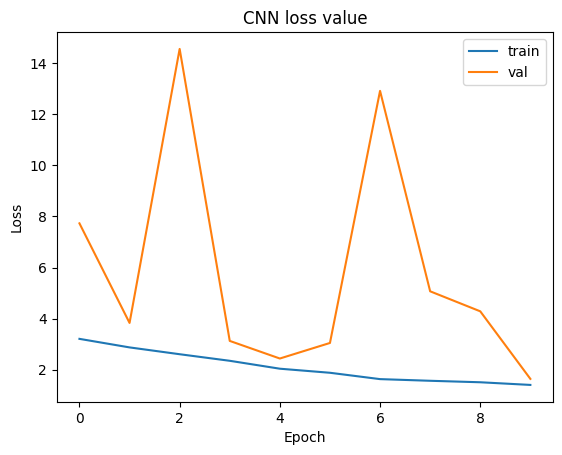

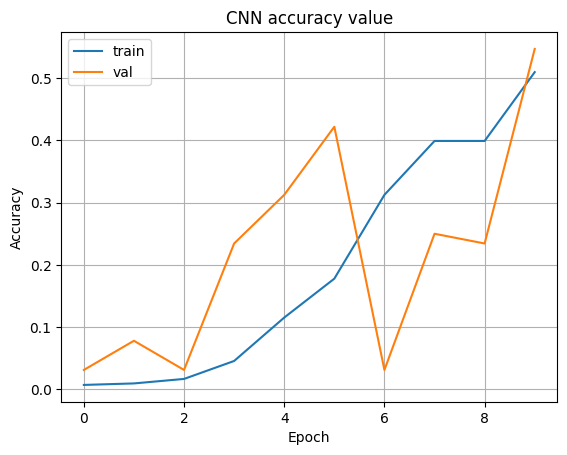

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("CNN loss value")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.grid(True)

plt.plot(history.history['custom_categorical_accuracy'], label='train')
plt.plot(history.history['val_custom_categorical_accuracy'], label='val')
plt.title("CNN accuracy value")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, model, test_generator):
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df
class_report(validation_generator, model, test_generator)

8/8 [==============================] - 20s 3s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
1-Volvo,1.000000,1.00000,1.000000,2.00000
10-BMW,1.000000,1.00000,1.000000,2.00000
11-Jeep,1.000000,0.50000,0.666667,2.00000
12-Kia,1.000000,0.50000,0.666667,2.00000
13-Citroen,1.000000,1.00000,1.000000,2.00000
14-Land Rover,1.000000,0.50000,0.666667,2.00000
15-Lexus,0.666667,1.00000,0.800000,2.00000
16-Mazda,1.000000,0.50000,0.666667,2.00000
17-Mercedes,1.000000,1.00000,1.000000,2.00000
18-Mini,1.000000,1.00000,1.000000,2.00000


8/8 [==============================] - 21s 3s/step


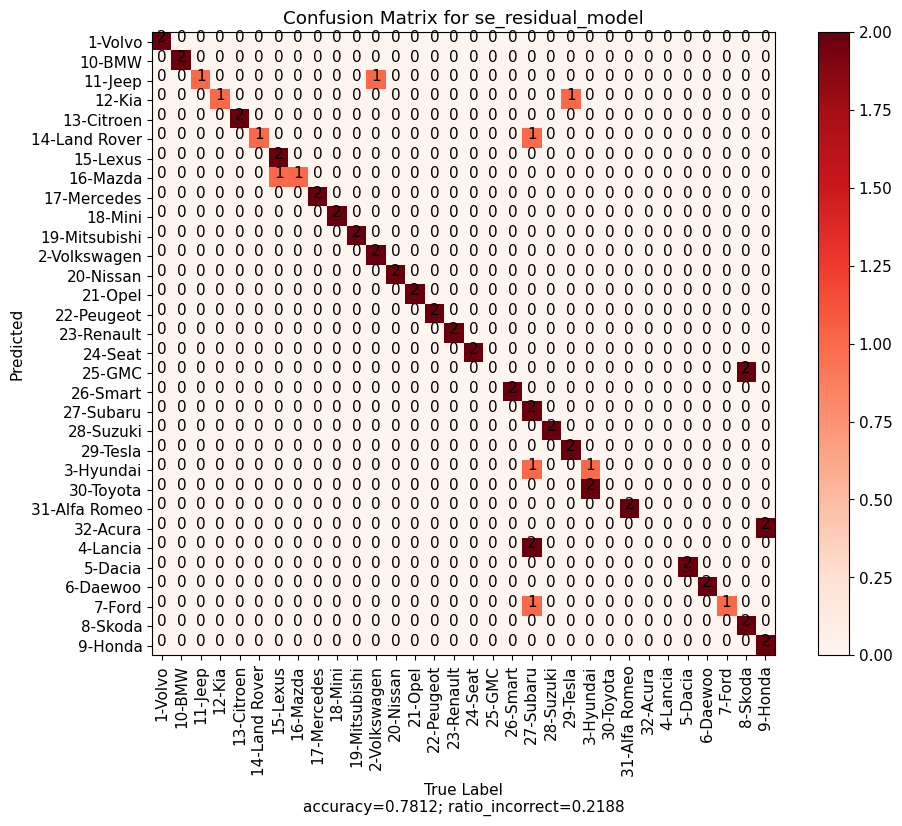

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(validation_generator, model, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)

    labels = validation_generator.classes

    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])

    cm = confusion_matrix(labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')

    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

plot_confusion_matrix(validation_generator, model, test_generator, 'se_residual_model')

In [ ]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(model, test_generator):
    y_true = test_generator.classes

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    cm = confusion_matrix(y_true, y_pred)

    if cm[1, 1] + cm[1, 0] == 0:
        sensitivity = np.nan
    else:
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    if cm[0, 0] + cm[0, 1] == 0:
        specificity = np.nan
    else:
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return sensitivity, specificity

sensitivity, specificity = sensitivity_specificity(model, test_generator)
print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

8/8 [==============================] - 16s 2s/step
Sensitivity: 1.0, Specificity: 1.0


8/8 [==============================] - 16s 2s/step


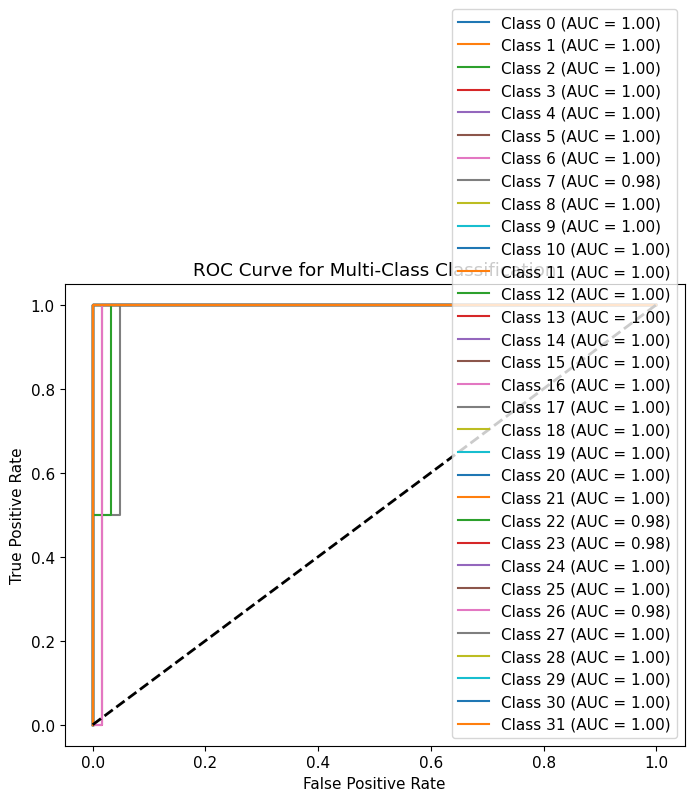

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)

# Convert labels to one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

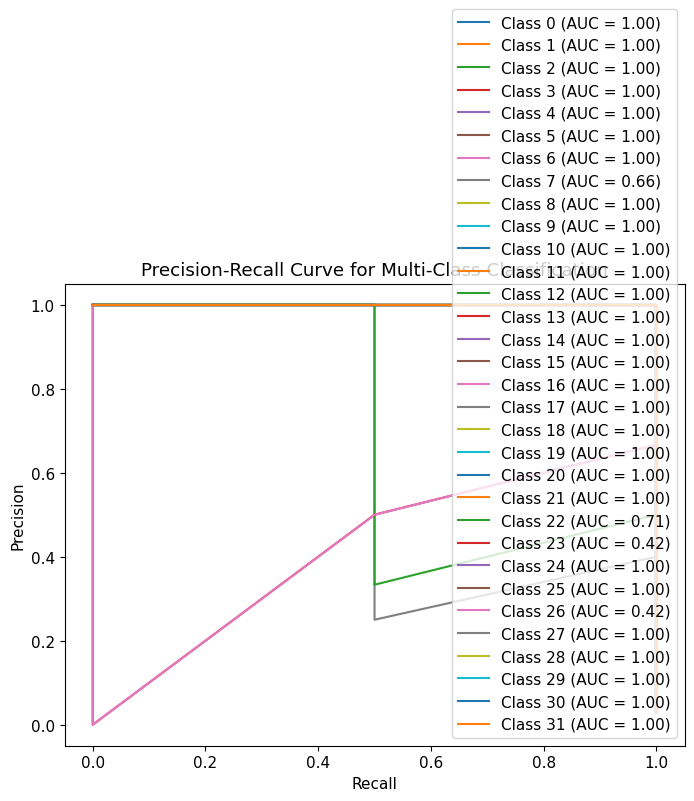

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for each class
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_one_hot[:, i], y_pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


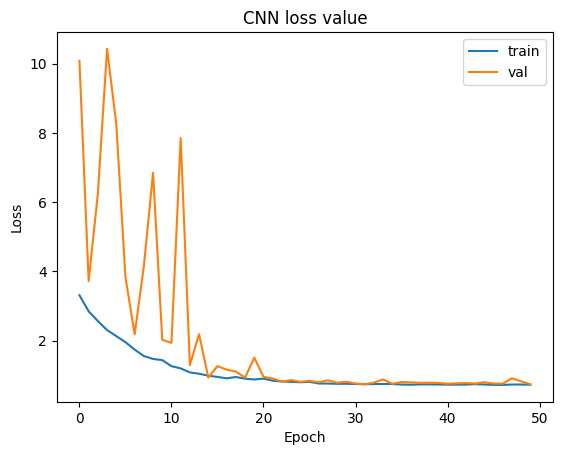

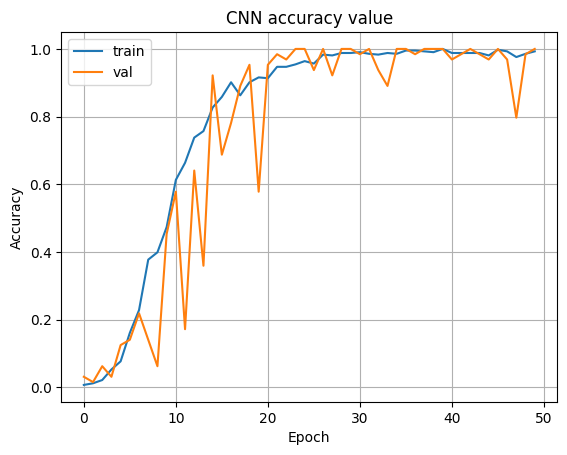

In [ ]:
import matplotlib.pyplot as plt
# 绘制loss图
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("CNN loss value")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.grid(True)

# 绘制准确率
plt.plot(history.history['custom_categorical_accuracy'], label='train')
plt.plot(history.history['val_custom_categorical_accuracy'], label='val')
plt.title("CNN accuracy value")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Multiply

def se_block(x, reduction_ratio=16):
    channels = x.shape[-1]

    # Squeeze (Global Average Pooling)
    squeeze = GlobalAveragePooling2D()(x)

    # Excitation (Fully connected layers)
    excitation = Dense(channels // reduction_ratio, activation='relu')(squeeze)
    excitation = Dense(channels, activation='sigmoid')(excitation)

    # Reshape to (1, 1, C)
    excitation = tf.keras.layers.Reshape((1, 1, channels))(excitation)

    # Scale input by the excitation
    scaled_x = Multiply()([x, excitation])

    return scaled_x

def deep_se_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = inputs

    # Convolutional Block 1
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Convolutional Block 2
    x = Conv2D(128, 3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Convolutional Block 3
    x = Conv2D(256, 3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

# Example usage:
input_shape = (224, 224, 3)  # Adjust input shape according to your data
num_classes = 32  # Adjust the number of classes for your task
model = deep_se_cnn_model(input_shape, num_classes)
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 224, 224, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_15 (Ba  (None, 224, 224, 64)         256       ['conv2d_15[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_13 (ReLU)             (None, 224, 224, 64)         0         ['batch_normalization_15

In [ ]:
model.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=0.001), metrics=[custom_categorical_accuracy])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=2)

Epoch 1/10
52/52 - 614s - loss: 3.3687 - custom_categorical_accuracy: 0.0000e+00 - val_loss: 3.3854 - val_custom_categorical_accuracy: 0.0000e+00 - 614s/epoch - 12s/step
Epoch 2/10
52/52 - 605s - loss: 3.1272 - custom_categorical_accuracy: 0.0048 - val_loss: 3.3769 - val_custom_categorical_accuracy: 0.0000e+00 - 605s/epoch - 12s/step
Epoch 3/10
52/52 - 601s - loss: 2.9584 - custom_categorical_accuracy: 0.0072 - val_loss: 3.7917 - val_custom_categorical_accuracy: 0.0000e+00 - 601s/epoch - 12s/step
Epoch 4/10
52/52 - 596s - loss: 2.8668 - custom_categorical_accuracy: 0.0072 - val_loss: 3.7101 - val_custom_categorical_accuracy: 0.0312 - 596s/epoch - 11s/step
Epoch 5/10
52/52 - 585s - loss: 2.7335 - custom_categorical_accuracy: 0.0120 - val_loss: 2.9427 - val_custom_categorical_accuracy: 0.0469 - 585s/epoch - 11s/step
Epoch 6/10


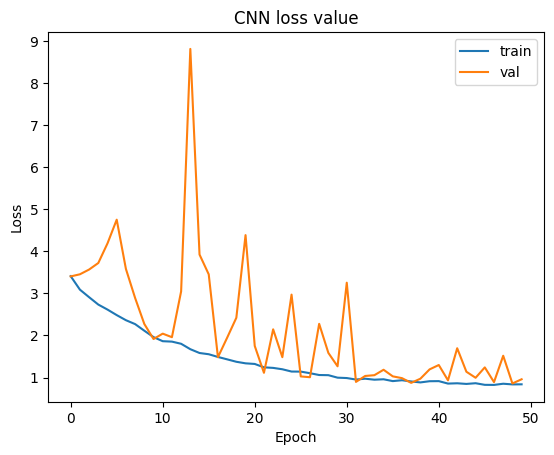

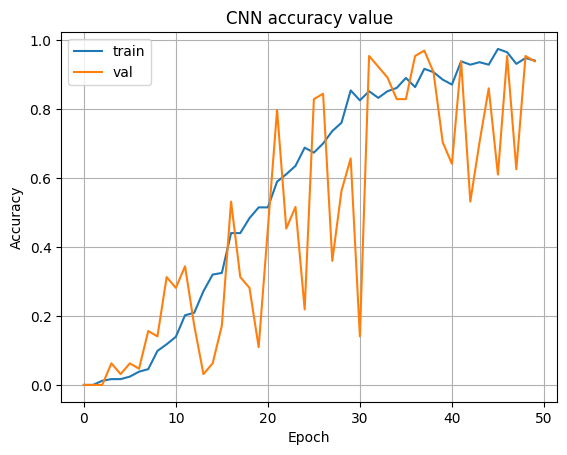

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("CNN loss value")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.grid(True)


plt.plot(history.history['custom_categorical_accuracy'], label='train')
plt.plot(history.history['val_custom_categorical_accuracy'], label='val')
plt.title("CNN accuracy value")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, model, test_generator):
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df
class_report(validation_generator, model, test_generator)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Multiply, Add

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # First convolution layer
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second convolution layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Residual connection
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x

def se_block(x, reduction_ratio=16):
    channels = x.shape[-1]

    # Squeeze (Global Average Pooling)
    squeeze = GlobalAveragePooling2D()(x)

    # Excitation (Fully connected layers)
    excitation = Dense(channels // reduction_ratio, activation='relu')(squeeze)
    excitation = Dense(channels, activation='sigmoid')(excitation)

    # Reshape to (1, 1, C)
    excitation = tf.keras.layers.Reshape((1, 1, channels))(excitation)

    # Scale input by the excitation
    scaled_x = Multiply()([x, excitation])

    return scaled_x

def se_residual_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional Layer
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Residual Blocks with SE Attention
    x = residual_block(x, 64)
    x = se_block(x)
    x = residual_block(x, 64)
    x = se_block(x)
    x = residual_block(x, 128, stride=2)
    x = se_block(x)
    x = residual_block(x, 128)
    x = se_block(x)
    x = residual_block(x, 256, stride=2)
    x = se_block(x)
    x = residual_block(x, 256)
    x = se_block(x)
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

def deep_se_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = inputs

    # Convolutional Block 1
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Convolutional Block 2
    x = Conv2D(128, 3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Convolutional Block 3
    x = Conv2D(256, 3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = se_block(x)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

def integrated_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First Model
    model1_output = se_residual_model(input_shape, num_classes)(inputs)

    # Second Model
    model2_output = deep_se_cnn_model(input_shape, num_classes)(inputs)

    # Concatenate or Add the outputs of the two models
    # Choose one of the following lines based on your preference
    # integrated_output = Concatenate()([model1_output, model2_output])
    integrated_output = Add()([model1_output, model2_output])

    integrated_model = tf.keras.Model(inputs=inputs, outputs=integrated_output)
    return integrated_model

# Example usage:
input_shape = (224, 224, 3)  # Adjust input shape according to your data
num_classes = 32  # Adjust the number of classes for your task
model = integrated_model(input_shape, num_classes)
model.summary()


Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_32 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model_30 (Functional)       (None, 32)                   2820184   ['input_32[0][0]']            
                                                                                                  
 model_31 (Functional)       (None, 32)                   1168444   ['input_32[0][0]']            
                                                                                                  
 add_19 (Add)                (None, 32)                   0         ['model_30[0][0]',            
                                                                     'model_31[0][0]']     

In [ ]:
model.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=0.001), metrics=[custom_categorical_accuracy])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=100, verbose=2)

Epoch 1/100
52/52 - 29s - loss: 0.8761 - custom_categorical_accuracy: 0.5601 - val_loss: 2.0593 - val_custom_categorical_accuracy: 0.1875 - 29s/epoch - 549ms/step
Epoch 2/100
52/52 - 7s - loss: 0.7547 - custom_categorical_accuracy: 0.6707 - val_loss: 1.5672 - val_custom_categorical_accuracy: 0.3125 - 7s/epoch - 137ms/step
Epoch 3/100
52/52 - 7s - loss: 0.7419 - custom_categorical_accuracy: 0.7043 - val_loss: 0.9643 - val_custom_categorical_accuracy: 0.5469 - 7s/epoch - 138ms/step
Epoch 4/100
52/52 - 7s - loss: 0.7672 - custom_categorical_accuracy: 0.6683 - val_loss: 0.7594 - val_custom_categorical_accuracy: 0.6562 - 7s/epoch - 138ms/step
Epoch 5/100
52/52 - 7s - loss: 0.6707 - custom_categorical_accuracy: 0.7428 - val_loss: 0.8099 - val_custom_categorical_accuracy: 0.6562 - 7s/epoch - 138ms/step
Epoch 6/100
52/52 - 7s - loss: 0.6508 - custom_categorical_accuracy: 0.7572 - val_loss: 0.6177 - val_custom_categorical_accuracy: 0.8281 - 7s/epoch - 138ms/step
Epoch 7/100
52/52 - 7s - loss: 0

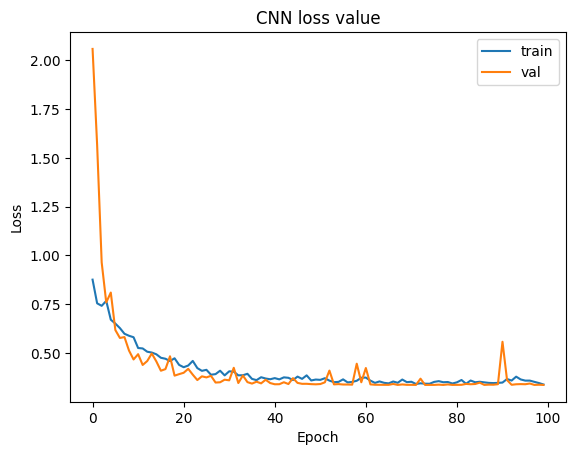

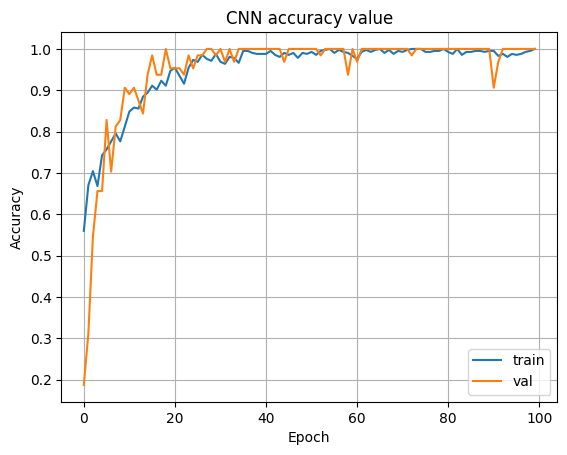

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("CNN loss value")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.grid(True)

plt.plot(history.history['custom_categorical_accuracy'], label='train')
plt.plot(history.history['val_custom_categorical_accuracy'], label='val')
plt.title("CNN accuracy value")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
x_test, y_test = test_generator.next()
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 71ms/step - loss: 0.3359 - custom_categorical_accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

8/8 [==============================] - 0s 40ms/step - loss: 0.3360 - custom_categorical_accuracy: 1.0000
Test accuracy: 1.0


8/8 [==============================] - 1s 39ms/step


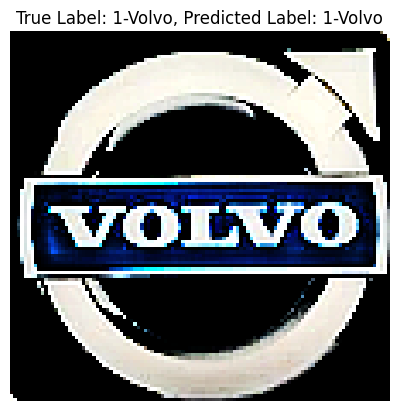

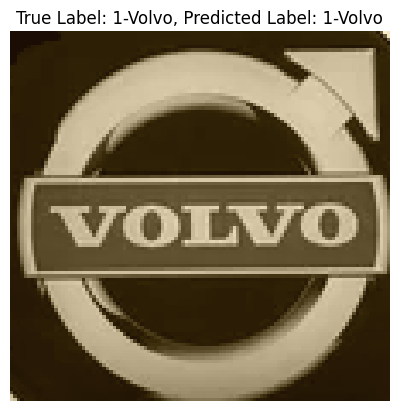

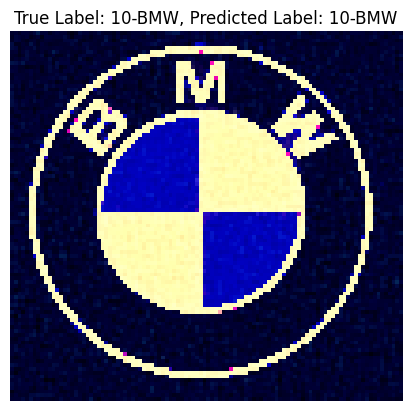

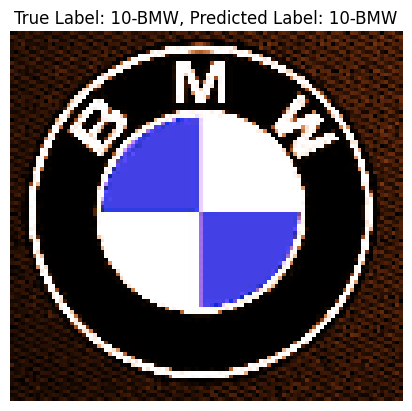

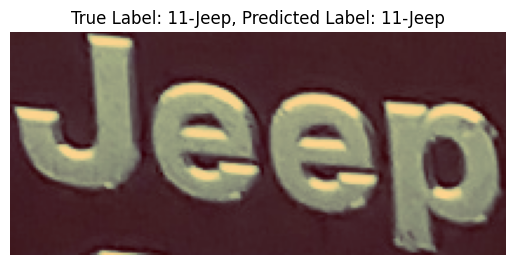

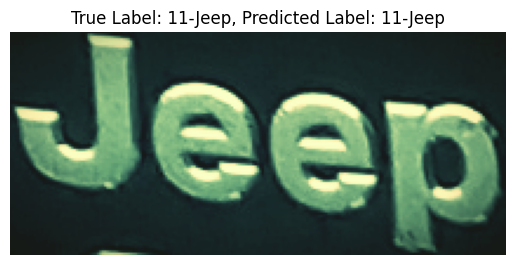

In [ ]:
predictions = model.predict(test_generator)
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(6):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

8/8 [==============================] - 0s 39ms/step


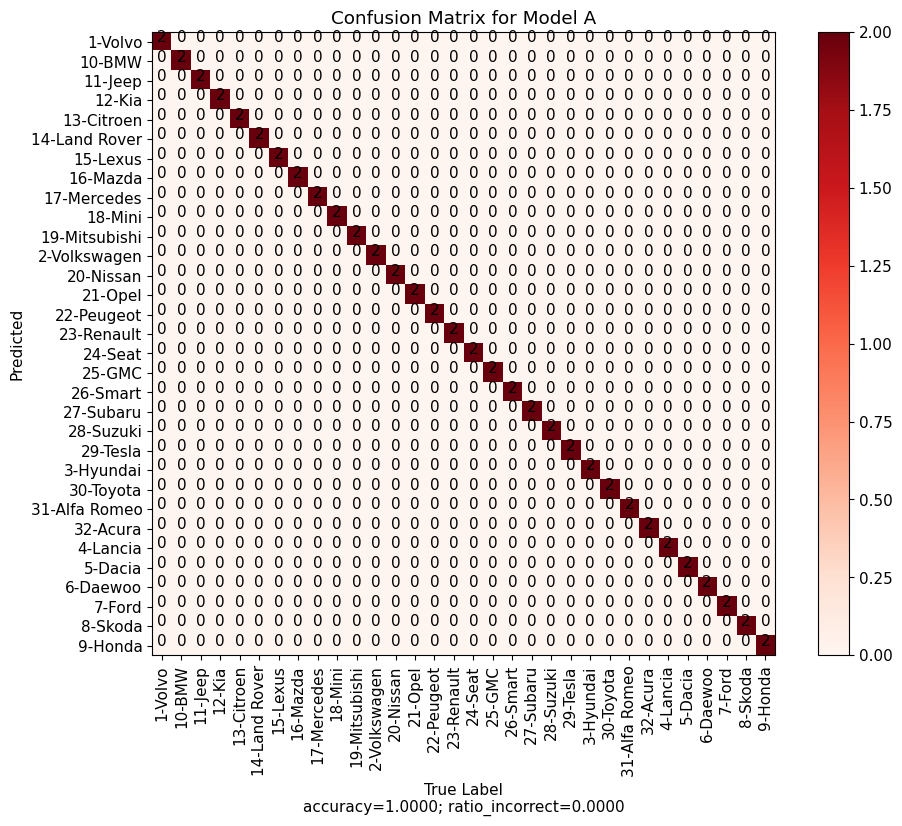

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(validation_generator, model, test_generator, model_name):
    plt.rcParams.update({'font.size': 11})

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    predictions = tf.nn.softmax(predictions, axis=1)

    labels = validation_generator.classes

    plot_labels = np.array([i for i in validation_generator.class_indices.keys()])

    cm = confusion_matrix(labels, preds)

    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    # plt.grid(b=False)

    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))

# 使用方式：
plot_confusion_matrix(validation_generator, model, test_generator, 'Model A')

8/8 [==============================] - 0s 39ms/step


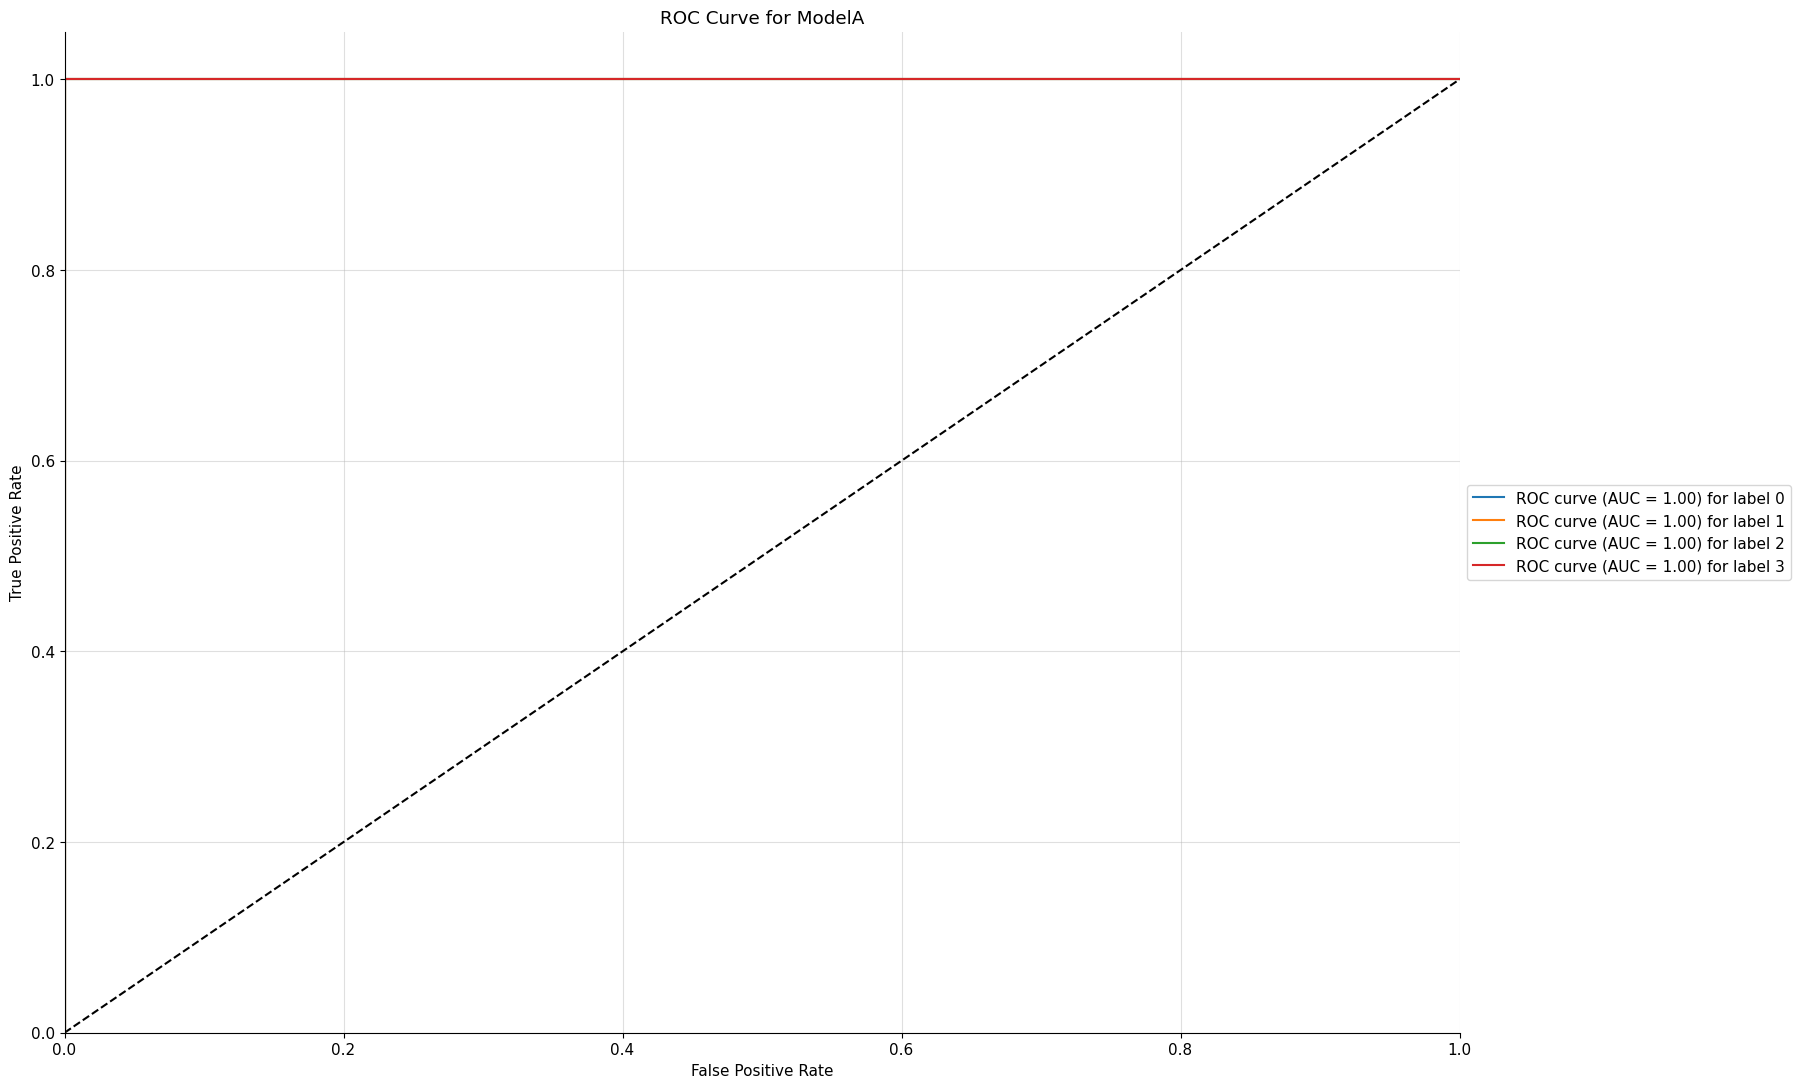

In [ ]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(model, test_generator, model_name):
    y_true = test_generator.classes
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(4):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(model, test_generator, 'ModelA')

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, model, test_generator):
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df
class_report(validation_generator, model, test_generator)

8/8 [==============================] - 0s 38ms/step


,precision,recall,f1-score,support
1-Volvo,1.0,1.0,1.0,2.0
10-BMW,1.0,1.0,1.0,2.0
11-Jeep,1.0,1.0,1.0,2.0
12-Kia,1.0,1.0,1.0,2.0
13-Citroen,1.0,1.0,1.0,2.0
14-Land Rover,1.0,1.0,1.0,2.0
15-Lexus,1.0,1.0,1.0,2.0
16-Mazda,1.0,1.0,1.0,2.0
17-Mercedes,1.0,1.0,1.0,2.0
18-Mini,1.0,1.0,1.0,2.0


In [ ]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(model, test_generator):
    y_true = test_generator.classes

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    cm = confusion_matrix(y_true, y_pred)

    if cm[1, 1] + cm[1, 0] == 0:
        sensitivity = np.nan
    else:
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    if cm[0, 0] + cm[0, 1] == 0:
        specificity = np.nan
    else:
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return sensitivity, specificity

sensitivity, specificity = sensitivity_specificity(model, test_generator)
print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

2/2 [==============================] - 1s 269ms/step
Sensitivity: nan, Specificity: nan


8/8 [==============================] - 0s 38ms/step


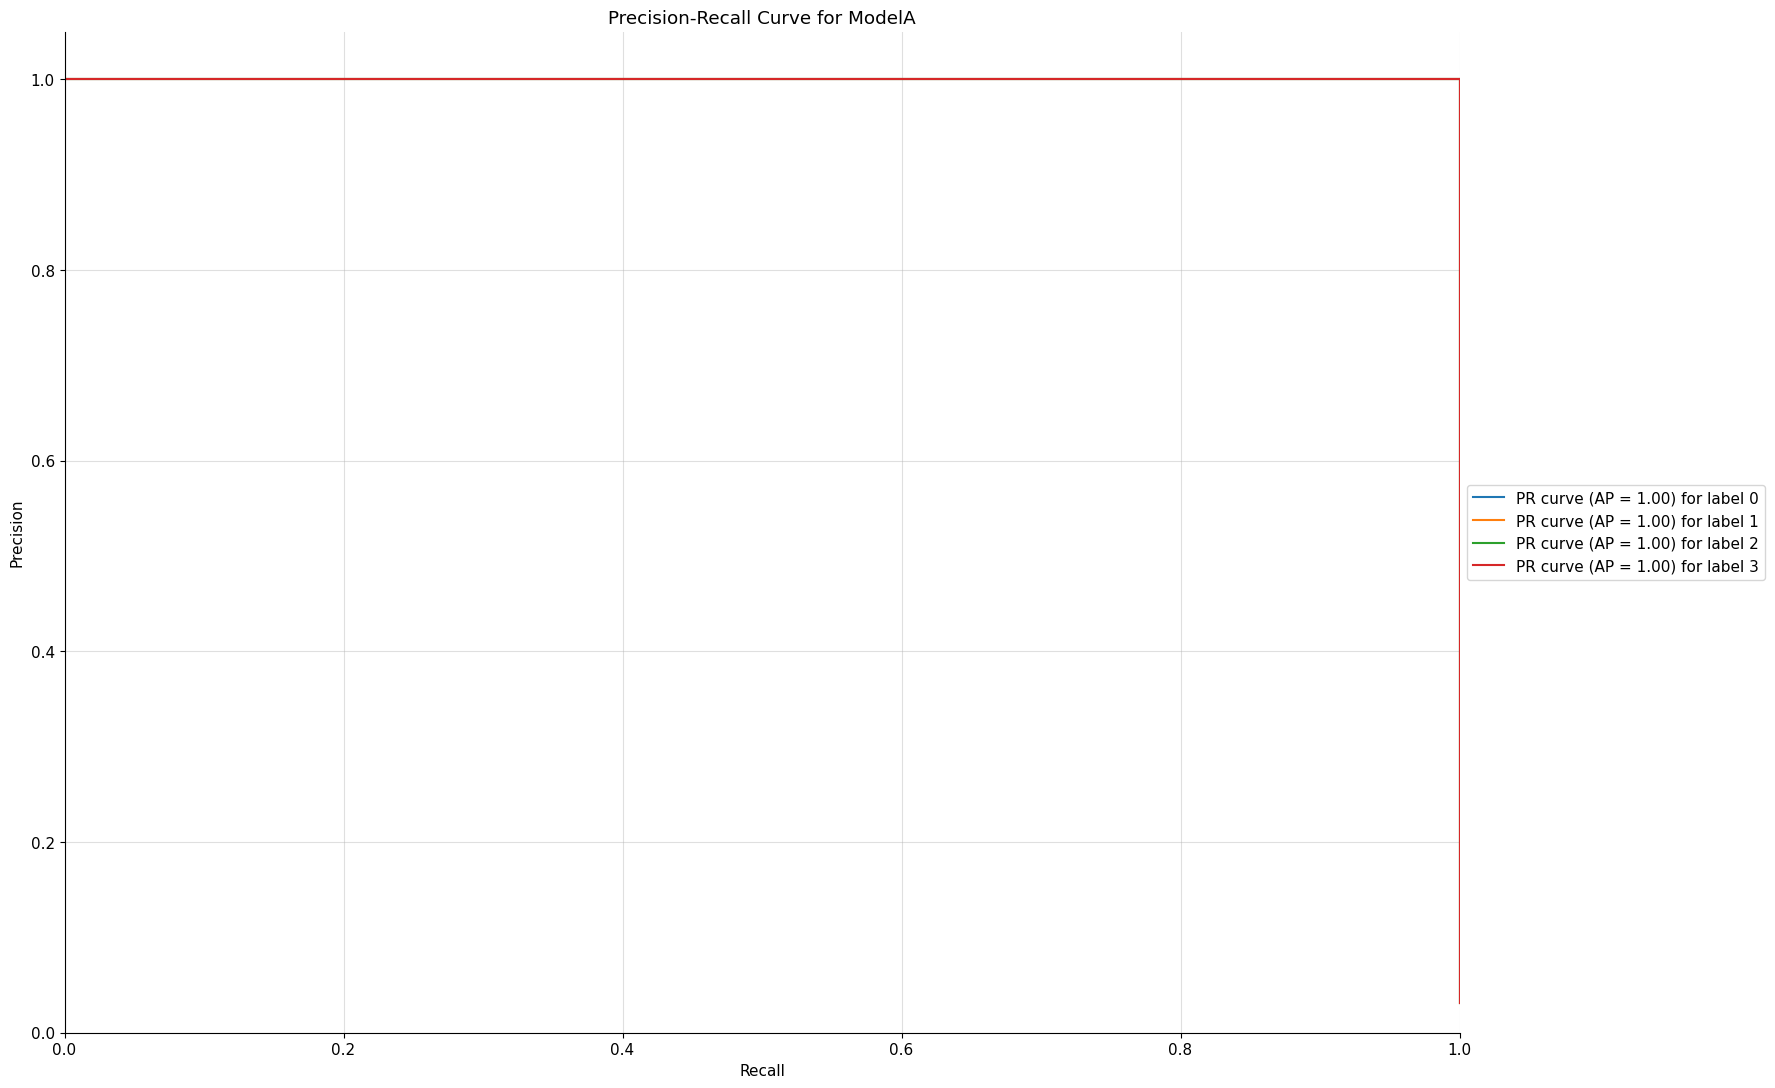

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(model, test_generator, model_name):
    y_true = test_generator.classes

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(4):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(4):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_precision_recall_curve(model, test_generator, 'ModelA')

Epoch 1/5
52/52 [==============================] - 92s 180ms/step - loss: 1.5194 - accuracy: 0.6490 - val_loss: 3.7592 - val_accuracy: 0.4219
Epoch 2/5
52/52 [==============================] - 7s 127ms/step - loss: 0.3004 - accuracy: 0.9159 - val_loss: 4.3826 - val_accuracy: 0.4375
Epoch 3/5
52/52 [==============================] - 9s 169ms/step - loss: 0.2693 - accuracy: 0.9327 - val_loss: 11.0815 - val_accuracy: 0.1250
Epoch 4/5
52/52 [==============================] - 7s 130ms/step - loss: 0.2167 - accuracy: 0.9351 - val_loss: 7.6913 - val_accuracy: 0.3438
Epoch 5/5
2/2 [==============================] - 0s 117ms/step - loss: 14.9279 - accuracy: 0.1250
Epoch 1/5
52/52 [==============================] - 41s 211ms/step - loss: 2.5591 - accuracy: 0.4231 - val_loss: 112.1586 - val_accuracy: 0.0312
Epoch 2/5
52/52 [==============================] - 8s 162ms/step - loss: 0.9828 - accuracy: 0.7236 - val_loss: 84.9597 - val_accuracy: 0.0312
Epoch 3/5
52/52 [==============================] -

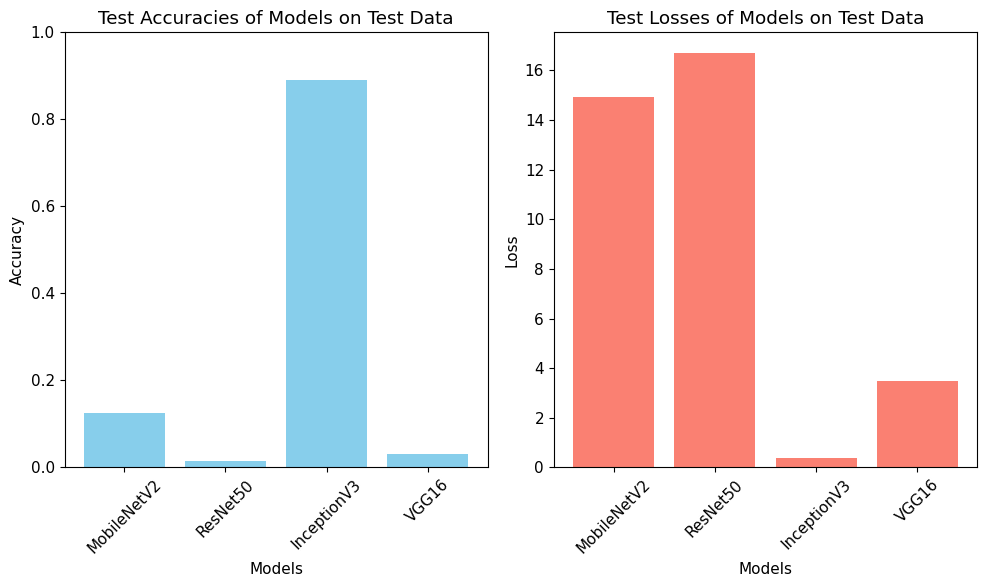

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, InceptionV3, VGG16

pretrained_models = {
    'MobileNetV2': MobileNetV2,
    'ResNet50': ResNet50,
    'InceptionV3': InceptionV3,
    'VGG16': VGG16
}

results = {}
for model_name, model_func in pretrained_models.items():
    base_model = model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator
    )

    test_loss, test_acc = model.evaluate(test_generator)
    results[model_name] = {'loss': test_loss, 'accuracy': test_acc}

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(results.keys(), [result['accuracy'] for result in results.values()], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracies of Models on Test Data')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(results.keys(), [result['loss'] for result in results.values()], color='salmon')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Test Losses of Models on Test Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def calculate_metrics(model, generator):
    predictions = model.predict(generator)
    y_true = generator.classes
    y_pred = predictions.argmax(axis=1)

    cm = confusion_matrix(y_true, y_pred)

    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    f1 = classification_report(y_true, y_pred)

    return sensitivity, specificity, f1

for model_name, model in results.items():
    sensitivity, specificity, f1 = calculate_metrics(model, test_generator)
    print(f"Metrics for {model_name}:")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"F1-score:\n{f1}\n")

In [ ]:
combined_model.save('eye_model.h1')

INFO:tensorflow:Assets written to: eye_model.h1/assets


INFO:tensorflow:Assets written to: eye_model.h1/assets
